## Predicting Daily Cases Using Non-linear Regression 

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('Cases_TimeSeries.csv')

In [121]:
data.head()

,Date,Daily_Confirmed,Total_Confirmed,Daily_Recovered,Total_Recovered,Daily_Deceased,Total_Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


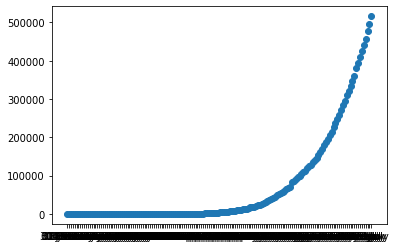

In [122]:
plt.scatter(data['Date'], data['Total_Recovered'])

#The graph looks similar to that of an exponential/logarithimic function

In [199]:
X = data.Total_Confirmed 
y = data.Daily_Confirmed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [235]:
def sigmoid(X, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(- Beta_1*(X - Beta_2)))  #defining a exponential function
    return y 

In [201]:
xdata = X / max(X)
ydata = y / max(y) 

In [202]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print('beta_1 = %f, beta_2 = %f' % (popt[0],popt[1]))

beta_1 = 5.671555, beta_2 = 0.477193


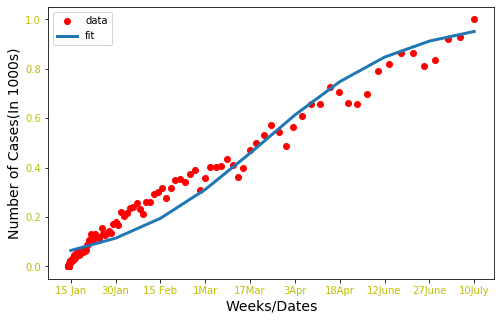

In [211]:
labelx = ['15 Jan','30Jan', '15 Feb', '1Mar', '17Mar', '3Apr', '18Apr', '12June', '27June','10July']

x = np.linspace(1, 165, 10)
# Normalize x
x = x / max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0], popt[1])
# Plotting the original data points
plt.plot(xdata, ydata, 'ro', label='data')
# Plotting the fitted prediction line
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Number of Cases(In 1000s)', color='black', fontsize=14)
plt.xlabel('Weeks/Dates', color='black', fontsize=14)
plt.xticks(x, labelx, color = 'y')
plt.yticks(color = 'y')
plt.show()

In [154]:
xtrain =  X_train / max(X_train)
ytrain =  y_train / max(y_train) 
xtest = X_test / max(X_test)
ytest = y_test / max(y_test)

In [155]:
popt1, pcov2 = curve_fit(sigmoid, xtrain, ytrain)
print('beta_1 = %f, beta_2 = %f' % (popt1[0],popt1[1]))

beta_1 = 5.607369, beta_2 = 0.476749


In [156]:
y_hat = sigmoid(xtest, *popt1)

In [157]:
mean_abs_error = np.mean(np.absolute(y_hat - ytest))
mean_squ_error = np.mean(np.absolute((y_hat - ytest) **2))

print("Mean absolute error: %.2f" %mean_abs_error)
print("Residual sum of squares (MSE): %.2f" %mean_squ_error)

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00


In [192]:
from sklearn.metrics import r2_score
r_score = r2_score(y_hat, ytest)
print("R2-score between total cases and daily cases:", r_score)

R2-score between total cases and daily cases: 0.9585230572193704


## Prediction of recovered cases when total cases are known

In [163]:
Y = data.Total_Confirmed 
z = data.Daily_Recovered 

In [165]:
Y_train, Y_test, z_train, z_test = train_test_split(Y, z, test_size=0.2) 

def sigma(Y, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(- Beta_1*(X - Beta_2)))
    return y 

In [178]:
ydata = Y / max(Y)
zdata = z / max(z) 

In [225]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, ydata, zdata)
print('beta_1 = %f, beta_2 = %f' % (popt[0],popt[1]))

beta_1 = 6.021007, beta_2 = 0.541678


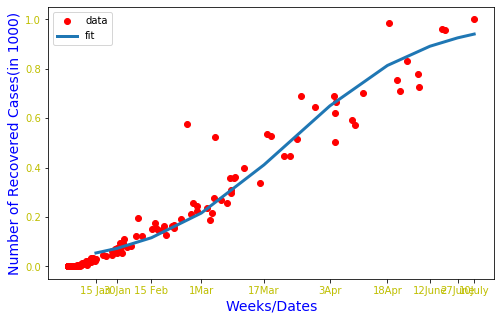

In [233]:
x = np.linspace(1, 165, 10)
# Normalize x
y = y / max(y)
plt.figure(figsize=(8,5))
z = sigmoid(y, popt[0], popt[1])
# Plotting the original data points
plt.plot(ydata, zdata, 'ro', label='data')
# Plotting the fitted prediction line
plt.plot(y, z, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Number of Recovered Cases(in 1000)', color='blue', fontsize=14)
plt.xlabel('Weeks/Dates', color='blue', fontsize=14)
plt.xticks(y, labelx, color = 'y')
plt.yticks(color = 'y')
plt.show()

In [234]:
Ytrain =  Y_train / max(Y_train)
ztrain =  z_train / max(z_train) 
Ytest = Y_test / max(Y_test)
ztest = z_test / max(z_test)

In [220]:
popt1, pcov2 = curve_fit(sigmoid, Ytrain, ztrain)
print('beta_1 = %f, beta_2 = %f' % (popt1[0],popt1[1]))

beta_1 = 5.992413, beta_2 = 0.514388


In [221]:
z_hat = sigmoid(Ytest, *popt1)

In [222]:
mean_abs_error = np.mean(np.absolute(z_hat - ztest))
mean_squ_error = np.mean(np.absolute((z_hat - ztest) **2))

print("Mean absolute error: %.2f" %mean_abs_error)
print("Residual sum of squares (MSE): %.2f" %mean_squ_error)

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00


In [223]:
from sklearn.metrics import r2_score
r_score = r2_score(z_hat, ztest)
print("R2-score between total cases and recovered cases:", r_score)

R2-score between total cases and recovered cases: 0.9452790281348749
